# Simulación del modelo de Ising bidimensional mediante el Algoritmo de Metropolis 

En primer lugar, se importan los paquetes para realizar las gráficas, implementar cálculos y geenrar números aleatorios respectivamente

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random

Luego, se fijan las variables del sistema como son: el factor de interacción entre espines $J=1$, la dimensión de la red cuadrada con lado $L=20$ conformado por 400 espines, la constante de Boltzmann $k_B=1$, y la temperatura crítica teórica $T_c=\frac{2}{\ln(\sqrt{2}+1)}.$

In [23]:
J=1
L=20
k=1
Tc=2/(np.log(np.sqrt(2)+1))

Posteriormente se define la función de energía, primero, creando un arreglo de espines con dos filas y dos columnas de ceros adicionales al inicio y al final de la red de espines y sumando sobre todos los pares de espines de acuerdo con la fórmula:
$$
H=-J\sum_{<i,j>}s_is_j
$$

In [24]:
def energia(red):
  # Creación del arreglo de espines extendido    
  ME=np.zeros((len(red)+2,len(red)+2))
  ME[1:-1,1:-1]=red
  # Suma sobre los pares de espines para hallar la energía total del sitema
  E=0
  for i in range(1,len(ME)-1):
    for j in range(1,len(ME)-1):
      E=E+ME[i][j]*ME[i+1][j]++ME[i][j]*ME[i-1][j] +ME[i][j]*ME[i][j+1]+ME[i][j]*ME[i][j-1]
  return -J*E/2        

Asimismo se define la función de magnetización por espín mediante el promedio del valor de los espines de la red que ingresa como entrada.

In [25]:
def magnetizacion(red):
  return np.mean(red)

Después, se define la función que genera la red inicial de espines a partir de la longitud $L$ se crea un arreglo de ceros que es llenado con valores aleatorios entre los estados $+1$ y $-1$ para los espines $s_i$ que pertenecen a la red.

In [26]:
def generar_Red(L):
  M=np.zeros((L,L))
  for i in range(len(M)):
    for j in range(len(M)):
      M[i][j]=random.choice([1,-1])
  return M    

Además, se define la función de cambiar espín que tiene por entrada la red original y la posición $(x,y)$ del espín que se desea modificar. Luego, se modifica el estado del espín en dicha posición de $+1$ a $-1$ o viceversa y se retorna la red de espines con esta modificación.

In [27]:
def cambiar_spin(red, posx, posy):
  red_nueva=np.copy(red)
  red_nueva[posx][posy]=-red[posx,posy]
  return red_nueva

La implementación del Algoitmo de Metropolis se condensa en la función de evolución del sistema de espines. Este tiene por entrada una red inicial de espines, el número de iteraciones que presentará el sistema, la temperatura $T$ a la que se encuentra la configuración y el porcentaje de las iteraciones desde la cual se reportará el promedio en la energía y la magnetización por espín. En la computación de las iteración se ejecutaron los pasos descritos en el enunciado de la tarea que también se encuentran disponibles en el artículo del trabajo.
    
En cada iteración del proceso se calcula la energía total del sistema y su magnetización por espín. Como retorno se grafica la configuración de espines de la última iteración, se reportan las listas de energía total y magnetización por espín correspondiente a cada iteración, y se entrega el promedio por iteración del último $(1-pCompleta)100\%$ de iteraciones para las variables de energía total y magnetización.

In [28]:
def evolucion(red, iteraciones, T, pCompleto):
  # Se definen las variables beta, la lista de energías y magnetizaciones y se copia la configuración de espines inicial.
  beta=1/(k*T)
  Energias=[energia(red)]
  Magnetizaciones=[magnetizacion(red)]
  red1=np.copy(red)
  # Se ejecutan las iteraciones
  for i in range(1,iteraciones):
    # Se halla el espín aleatorio que se va a cambiar y se calcula la energía total de la red original y la red surgida de modificar el estado de dicho espín
    posx, posy=np.random.randint(len(red), size=2)
    E1=energia(red1)
    red2=cambiar_spin(red1,posx,posy)
    E2=energia(red2)
    # Se halla la probabilidad p y el peso estadístico p_lim con base en el cambio en la energía dE
    p=np.random.uniform(0,1)
    dE=E2-E1
    p_lim=np.exp(-beta*dE)
    if dE<=0 or (dE>0 and p<p_lim): #Se establecen las condiciones para que ocurra el cambio en la red
      red1=np.copy(red2)
    # Se calcula energía total y la magnetización por espín de la red surgida de la iteración
    Energias.append(energia(red1))
    Magnetizaciones.append(magnetizacion(red1))
    if (i==iteraciones-1): # Se guarda en una imagen png la configuración final de la red.
      plt.figure(figsize=(10,10))
      plt.imshow(red1)
      plt.colorbar()
      plt.title(r"Configuración final del Sistema de $20 \times 20$ espines para $T=$"+str(round(T,3)))
      plt.savefig("Configuracion_T"+str(T)+".png")
  # Se realizan los retornos mencionados
  return np.array(Energias), np.array(Magnetizaciones),np.mean(np.array(Energias)[int(pCompleto*iteraciones):]), np.mean(np.array(Magnetizaciones)[int(pCompleto*iteraciones):])   

Se generan las gráficas de las configuraciones finales a las temperaturas 1,5 y 3,5 con $4.0\times10^5$ iteraciones a través de la ejecución de la función evolucion. El objetivo es crear las listas Energy y Magnetizacion con los arreglos de energía total y magnetización a cada iteración para cada tempertura.

0
1


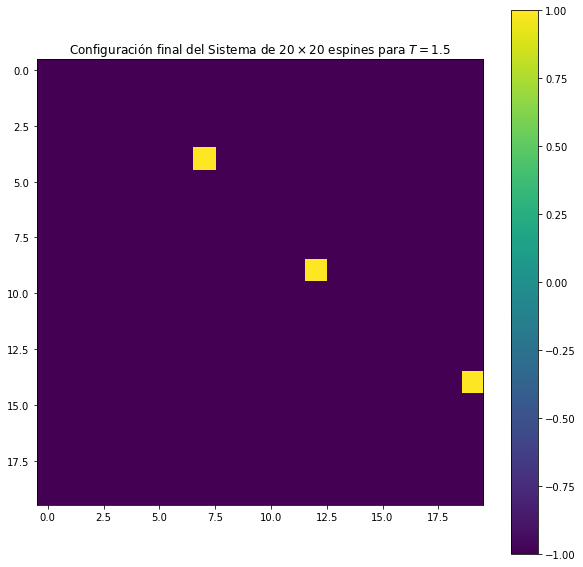

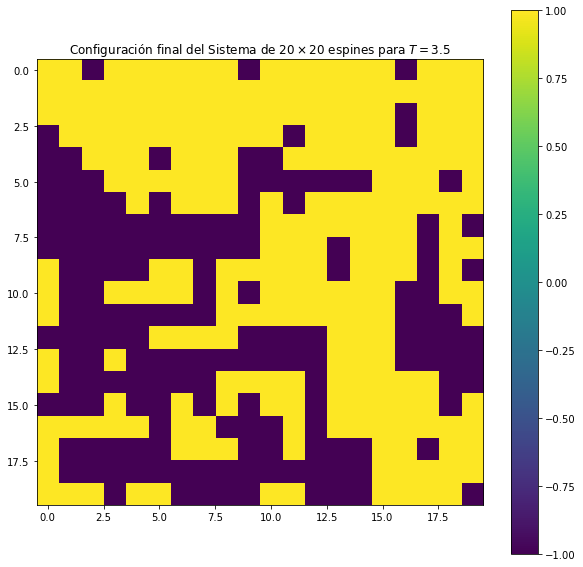

In [29]:
iter=400000
tiempo=np.arange(0,iter,1)
red_inicial=generar_Red(L)
Temperaturas=[1.5,3.5]
Energy=[]
Magnetizacion=[]
for j in range(len(Temperaturas)):
  print(j)
  energy, magnet, prom_energia, prom_magnet=evolucion(red_inicial, iter, Temperaturas[j],0.0)
  Energy.append(energy)
  Magnetizacion.append(magnet)


Se grafican la energía y magnetización por espín en función del número de iteraciones para las temperaturas $T=1,5$ y $T=3,5$.

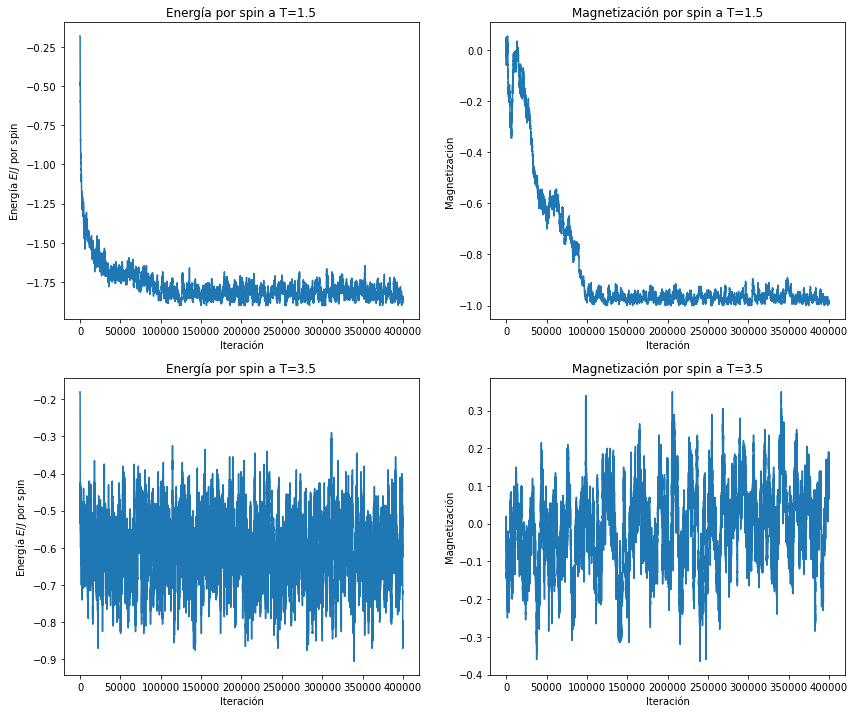

In [30]:
tiempo=np.arange(0,iter,1)
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plt.title('Energía por spin a T={}'.format(Temperaturas[0]))
plt.ylabel('Energía $E/J$ por spin')
plt.xlabel("Iteración")
plt.plot(tiempo, Energy[0]/(L**2))
plt.subplot(2,2,2)
plt.title('Magnetización por spin a T={}'.format(Temperaturas[0]))
plt.ylabel('Magnetización')
plt.xlabel("Iteración")
plt.plot(tiempo, Magnetizacion[0])
plt.subplot(2,2,3)
plt.title('Energía por spin a T={}'.format(Temperaturas[1]))
plt.ylabel('Energía $E/J$ por spin')
plt.xlabel("Iteración")
plt.plot(tiempo, Energy[1]/(L**2))
plt.subplot(2,2,4)
plt.title('Magnetización por spin a T={}'.format(Temperaturas[1]))
plt.ylabel('Magnetización')
plt.xlabel("Iteración")
plt.plot(tiempo, Magnetizacion[1])
plt.savefig("Energia_Magnetizacion_Fases.png")

Para los segundos resultados, creamos nuevamente la red inicial y hacemos un barrido de evoluciones con $4,0\times 10^5$ iteraciones para las temperaturas menores a la temperatura crítica $Temperaturas1=[1.000,1.167,1.333,1.500,1.667,1.833,2.000,2.167,2.222]$. 

In [13]:
iter=400000
red_inicial=generar_Red(L)
tiempo=np.arange(0,iter,1)
Temperaturas1=np.concatenate((np.linspace(1,13/6,8),np.array([2+2/9])))

Se crean las primeras entradas de las listas energias y magnetizaciones con los valores promedio de energía y magnetización por espín retornadas por la función evolucion para las $Temperaturas1$. Además se retornan las configuraciones finales a dichas temperaturas.

0
1
2
3
4
5
6
7
8


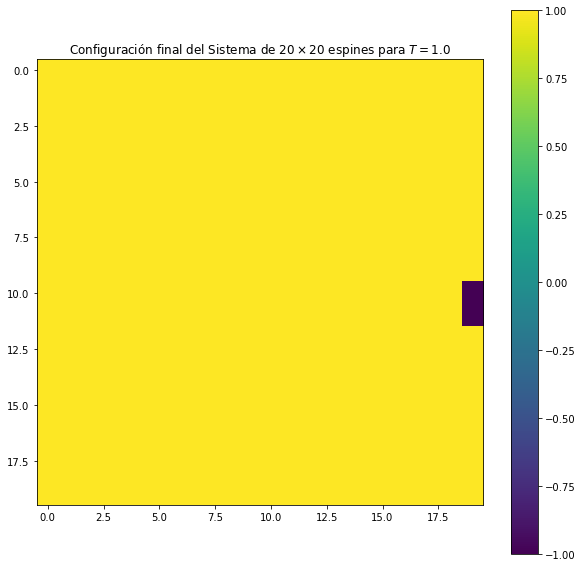

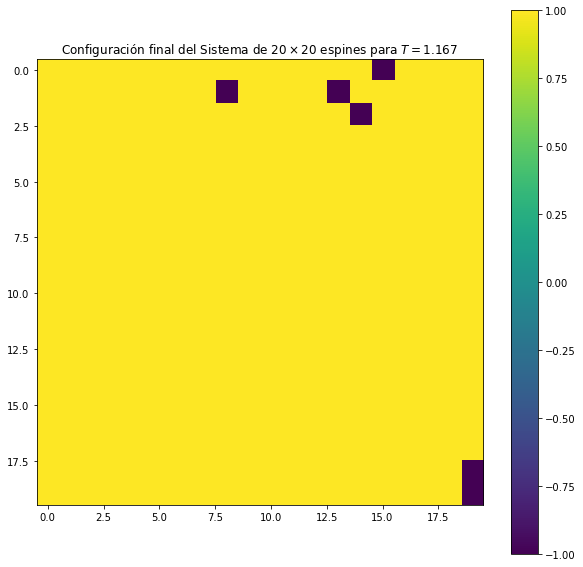

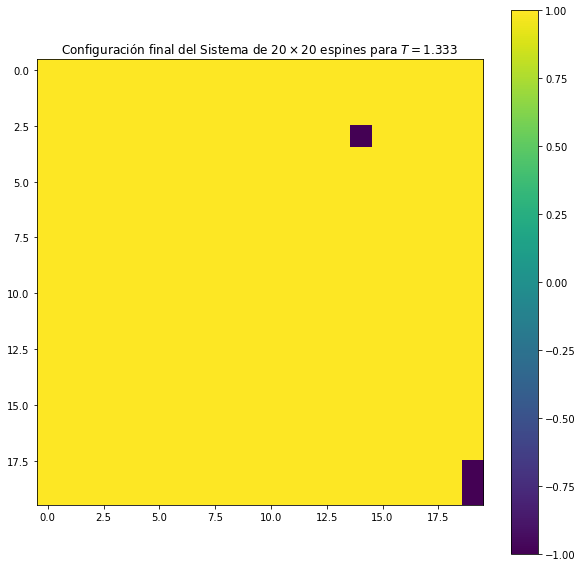

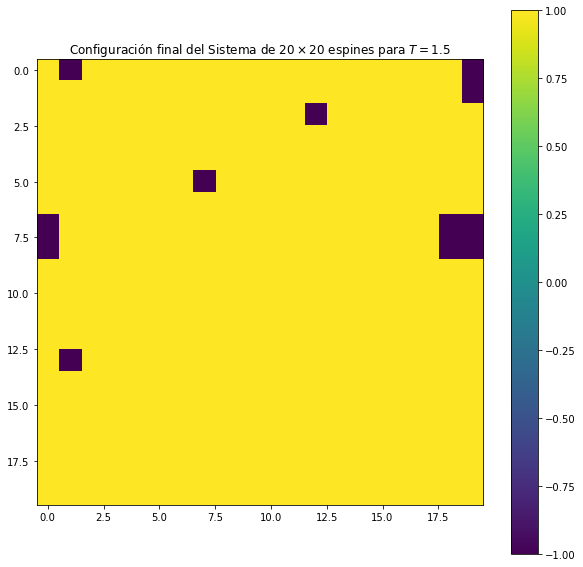

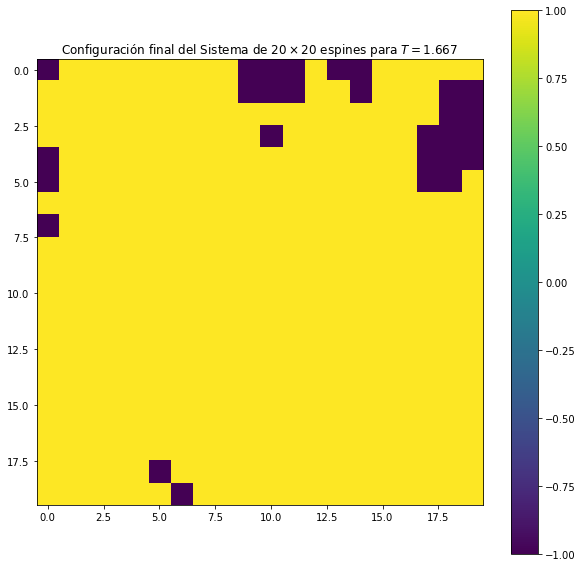

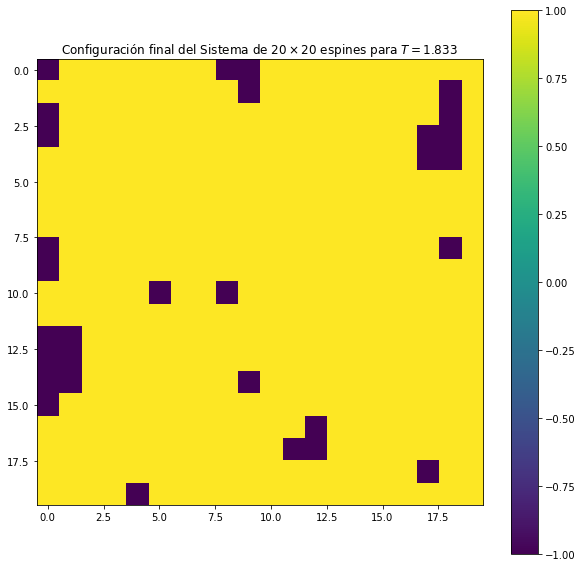

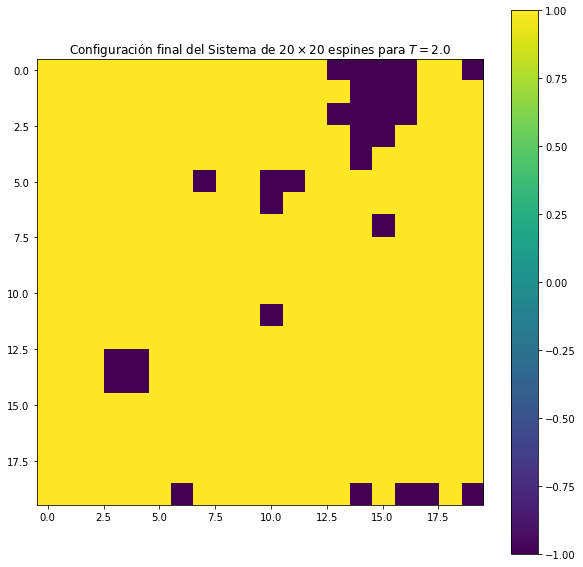

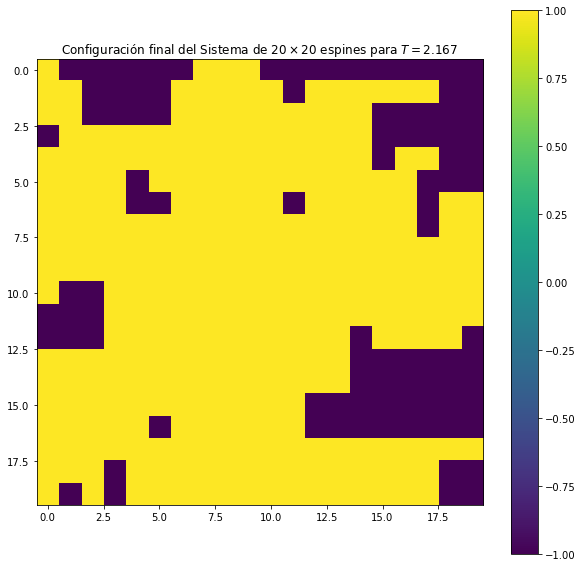

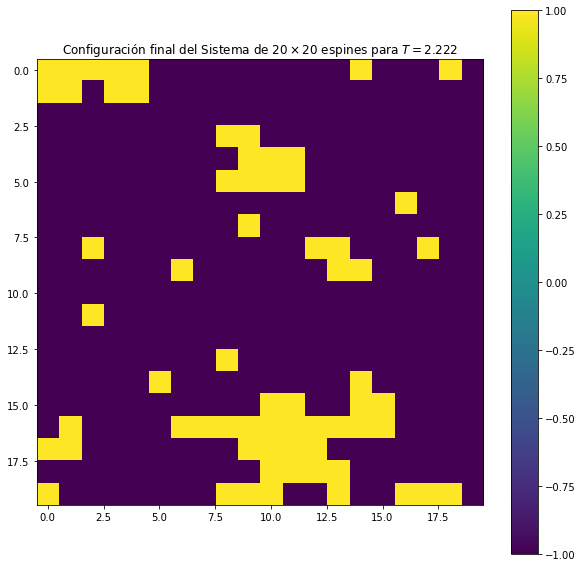

In [14]:
energias=np.zeros(2*len(Temperaturas1))
magnetizaciones=np.zeros(2*len(Temperaturas1))
for j in range(len(Temperaturas1)):
  print(j)
  energy, magnet, prom_energia, prom_magnet=evolucion(red_inicial, iter, Temperaturas1[j],0.7)
  energias[j]=prom_energia/(L**2)
  magnetizaciones[j]=prom_magnet

Para los segundos resultados, hacemos un barrido de evoluciones con $4,0\times 10^5$ iteraciones para las temperaturas mayores a la temperatura crítica $Temperaturas2=[2.278, 2.333,2.500,2.667,2.833,3.000,3.167,3.333,3.500]$.

In [15]:
Temperaturas2=np.concatenate((np.array([2.5-2/9]),np.linspace(7/3,3.5,8)))

Se crean las segundas entradas de las listas energias y magnetizaciones con los valores promedio de energía y magnetización por espín retornadas por la función evolucion para las $Temperaturas2$. Además se retornan las configuraciones finales a dichas temperaturas.

0
1
2
3
4
5
6
7
8


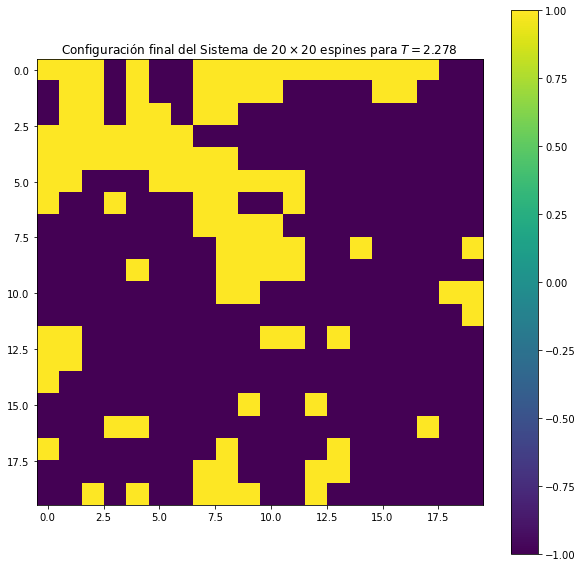

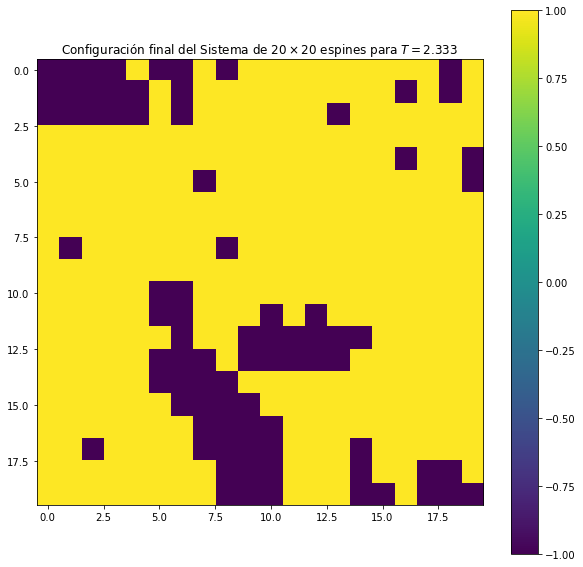

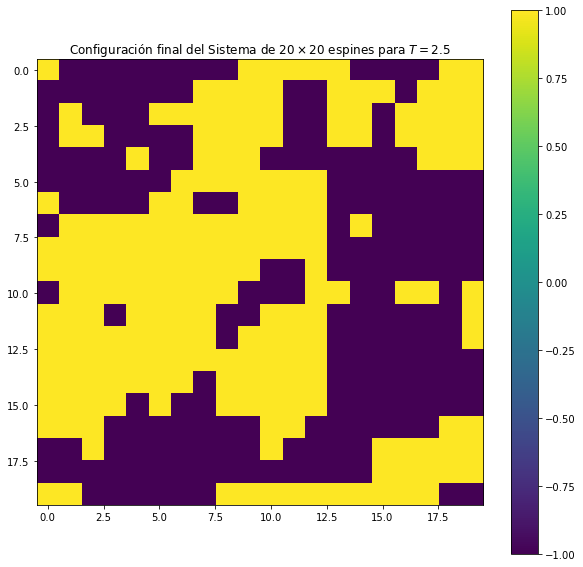

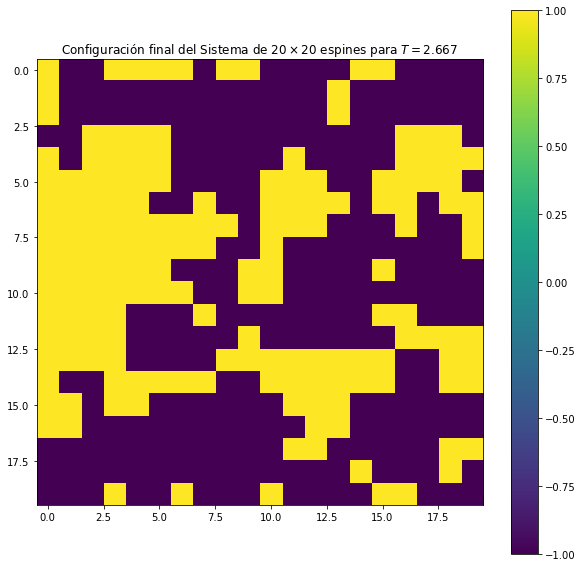

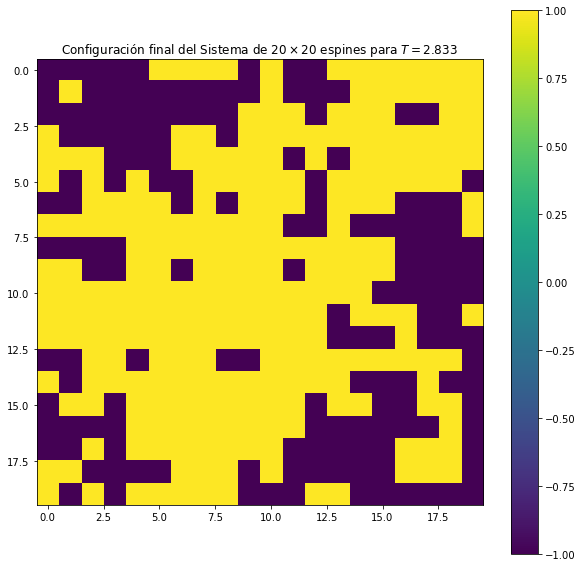

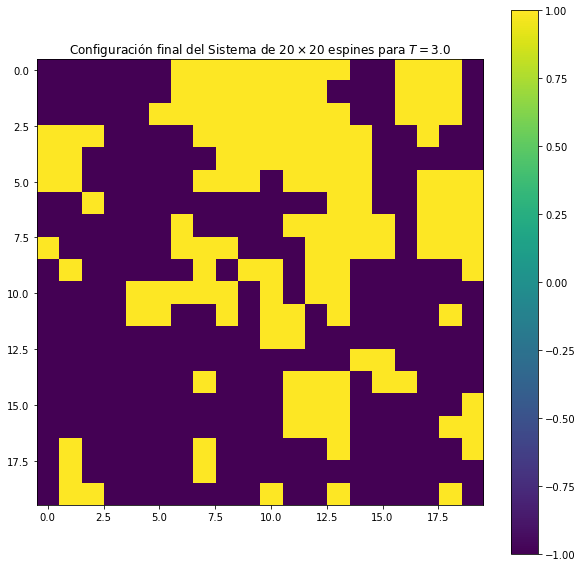

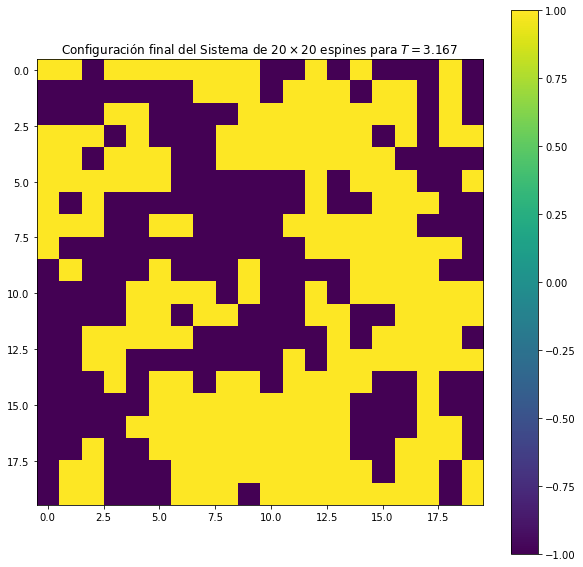

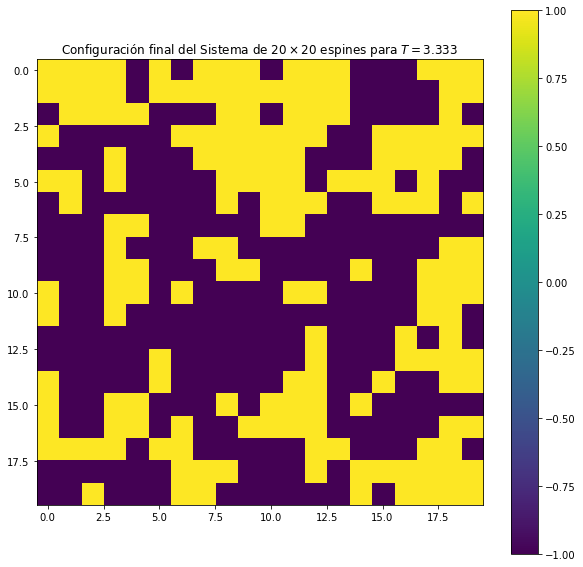

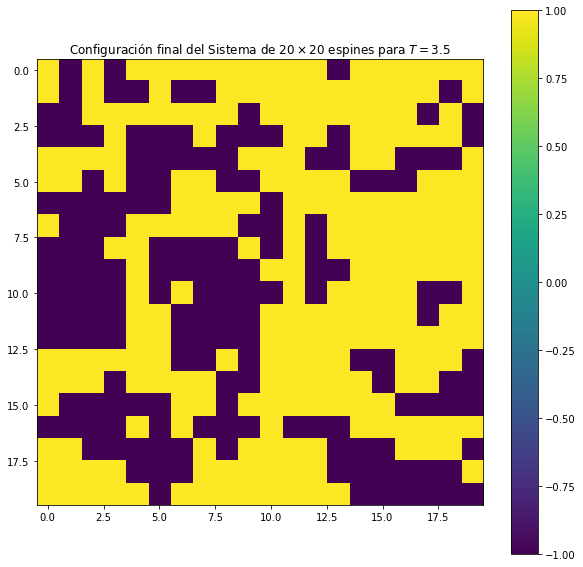

In [16]:
for j in range(len(Temperaturas2)):
  print(j)
  energy, magnet, prom_energia, prom_magnet=evolucion(red_inicial, iter, Temperaturas2[j],0.7)
  energias[j+len(Temperaturas1)]=prom_energia/(L**2)
  magnetizaciones[j+len(Temperaturas1)]=prom_magnet

Se generan las gráficas de energía y magnetización (también en valor absoluto) por spin a partir de las listas de energias y magnetizaciones a las temperaturas menores y mayores a la temperatura crítica $T_c$.

[-0.00473282 -0.00469933 -0.00464121 -0.00456149 -0.00438311 -0.00424347
 -0.0038469  -0.00324385 -0.00314805 -0.00296716 -0.00285006 -0.00246299
 -0.0022992  -0.00209255 -0.00188832 -0.00176633 -0.00163099 -0.00154926] [ 0.99739638  0.99285633  0.98332371  0.97045462  0.93357879  0.91675679
  0.80973925  0.46201042 -0.50806829 -0.19229458  0.11248296  0.08653562
  0.08205304  0.09242333  0.00372608  0.004478    0.01910746  0.01462267]


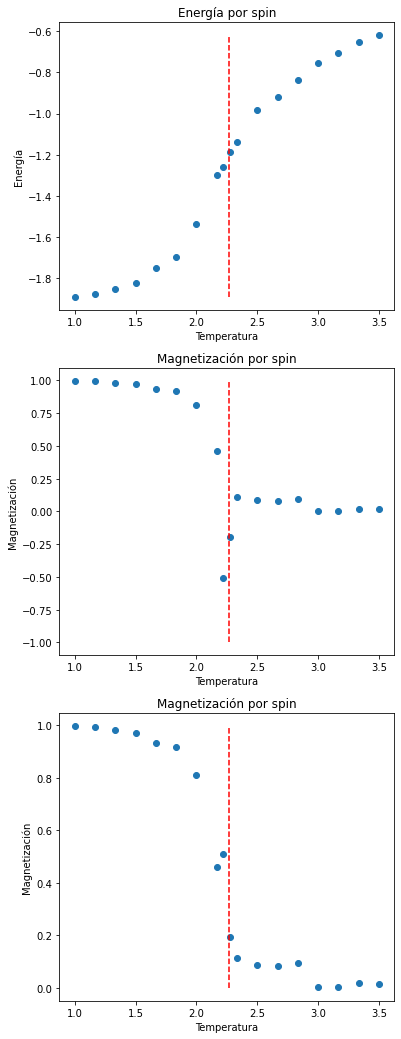

In [21]:
# Se crea el arreglo completo de temperaturas
Temperaturas=np.concatenate((Temperaturas1,Temperaturas2))

# Se crean las rectas que señalizan la temperatura crítica
recta1=np.arange(np.min(energias),np.max(energias),0.01)
recta2=np.arange(-1,1,0.01)
recta3=np.arange(0,1,0.01)

#Se generan las tres gráficas deseadas
plt.figure(figsize=(6,18))
plt.subplot(3,1,1)
plt.title("Energía por spin")
plt.ylabel("Energía")
plt.xlabel("Temperatura")
plt.scatter(Temperaturas, energias)
plt.plot(Tc*np.ones(len(recta1)),recta1,"--r")
plt.subplot(3,1,2)
plt.title("Magnetización por spin")
plt.ylabel("Magnetización")
plt.xlabel("Temperatura")
plt.scatter(Temperaturas, magnetizaciones)
plt.plot(Tc*np.ones(len(recta2)),recta2,"--r")
plt.subplot(3,1,3)
plt.title("Magnetización por spin")
plt.ylabel("Magnetización")
plt.xlabel("Temperatura")
plt.scatter(Temperaturas, np.abs(magnetizaciones))
plt.plot(Tc*np.ones(len(recta3)),recta3,"--r")
plt.savefig("Transiciones_Fase_Energia_Magnetizacion.png")
print(energias/(L**2), magnetizaciones)      